In [1]:
from datascience import *
%matplotlib inline
path_data = '/content/gdrive/MyDrive/DataScience/data/'
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# 신뢰구간 사용하기
신뢰구간은 하나의 목적을 가지고 있습니다 – 무작위 표본의 데이터를 기반으로 미지의 모수를 추정하는 것입니다. 마지막 절에서 우리는 구간 (36%, 42%)가 모집단의 산모 중 흡연자 비율에 대한 근사 95% 신뢰구간이라고 말했습니다. 그것은 우리의 추정으로, 모집단의 산모 중 흡연자 비율이 36%에서 42% 사이 어딘가에 있고, 우리의 추정 과정이 약 95%의 시간 동안 정확하다고 말하는 공식적인 방법이었습니다.

신뢰구간을 다른 목적으로 사용하려는 충동을 억제하는 것이 중요합니다. 예를 들어, 우리는 구간 (26.9세, 27.6세)를 모집단의 산모 평균 나이에 대한 근사 95% 신뢰구간으로 계산했습니다. 구간의 실망스럽게 흔한 오용은 여성의 약 95%가 26.9세에서 27.6세 사이였다고 결론 내리는 것입니다. 이것이 옳을 수 없다는 것을 알기 위해 신뢰구간에 대해 많이 알 필요가 없습니다 – 산모의 95%가 모두 나이가 서로 몇 개월 이내일 것으로 기대하지 않을 것입니다. 실제로 표본 추출된 나이의 히스토그램은 상당한 변동을 보여줍니다.

In [3]:
births = Table.read_table(path_data + 'baby.csv')

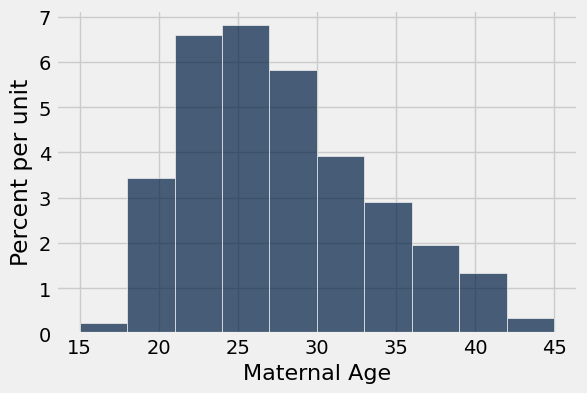

In [4]:
births.select('Maternal Age').hist()

표본 추출된 나이 중 작은 비율이 (26.9, 27.6) 구간에 있으며, 모집단에서도 유사한 작은 비율을 기대할 것입니다. 구간은 단지 하나의 숫자를 추정합니다: 모집단의 모든 나이의 *평균*.

그러나 신뢰구간으로 모수를 추정하는 것은 단순히 모수가 대략 얼마나 큰지 알려주는 것 외에 중요한 용도가 있습니다.

## 가설 검정을 위한 신뢰구간 사용
모집단의 평균 나이에 대한 우리의 근사 95% 신뢰구간은 26.9세에서 27.6세까지입니다. 누군가가 다음 가설을 검정하고자 한다고 가정해봅시다:

**귀무가설:** 모집단의 평균 나이는 30세입니다.

**대립가설:** 모집단의 평균 나이는 30세가 아닙니다.

그러면 p-값에 대해 5% 기준점을 사용하고 있다면 귀무가설을 기각할 것입니다. 이것은 30이 모집단 평균에 대한 95% 신뢰구간에 있지 않기 때문입니다. 5% 유의수준에서 30은 모집단 평균에 대한 그럴듯한 값이 아닙니다.

신뢰구간의 이러한 사용은 신뢰구간과 검정 사이의 *이중성*의 결과입니다: 모집단 평균이 특정 값 *x*인지 검정하고 p-값에 대해 5% 기준점을 사용한다면, *x*가 평균에 대한 95% 신뢰구간에 있지 않으면 귀무가설을 기각할 것입니다.

이것은 통계 이론으로 확립될 수 있습니다. 실제로는 귀무가설에서 지정된 값이 신뢰구간에 있는지 확인하는 것으로 귀결됩니다.

P-값에 대해 1% 기준점을 사용하고 있다면 귀무가설에서 지정된 값이 모집단 평균에 대한 99% 신뢰구간에 있는지 확인해야 합니다.

대략적으로, 이러한 진술은 표본이 크다면 모집단 비율에 대해서도 참입니다.

이제 신뢰구간을 사용하여 특정 종류의 가설을 검정하는 방법이 있지만, 모집단의 평균 나이가 30과 같은지 검정하는 가치에 대해 궁금해할 수 있습니다. 실제로 가치가 명확하지 않습니다. 하지만 이러한 종류의 가설 검정이 자연스럽고 유용한 상황이 있습니다.

## 기준선과 치료 후 점수 비교

호지킨병 치료에 대한 무작위 대조 시험에서 수집된 정보의 하위 집합인 데이터의 맥락에서 이것을 연구할 것입니다. 호지킨병은 일반적으로 젊은 사람들에게 영향을 미치는 암입니다. 이 질병은 치료 가능하지만 치료가 매우 가혹할 수 있습니다. 시험의 목적은 암을 치료하지만 환자에게 미치는 부작용을 최소화하는 용량을 찾는 것이었습니다.

테이블 ``hodgkins``는 22명의 환자의 폐에 대한 치료의 효과에 대한 데이터를 포함합니다. 열은 다음과 같습니다:

- 키(cm)
- 맨틀(목, 가슴, 겨드랑이)에 대한 방사선 측정
- 화학 요법 측정
- 기준선, 즉 치료 시작 시 폐의 건강 점수; 점수가 높을수록 폐가 더 건강함에 해당
- 치료 후 15개월의 동일한 폐의 건강 점수

In [ ]:
hodgkins = Table.read_table(path_data + 'hodgkins.csv')

In [ ]:
hodgkins.show()

height,rad,chemo,base,month15
164,679,180,160.57,87.77
168,311,180,98.24,67.62
173,388,239,129.04,133.33
157,370,168,85.41,81.28
160,468,151,67.94,79.26
170,341,96,150.51,80.97
163,453,134,129.88,69.24
175,529,264,87.45,56.48
185,392,240,149.84,106.99
178,479,216,92.24,73.43


우리는 기준선과 15개월 점수를 비교할 것입니다. 각 행이 한 명의 환자에 해당하므로, 우리는 기준선 점수의 표본과 15개월 점수의 표본이 *쌍을 이룬다*고 말합니다 – 각각 22개 값의 두 집합이 아니라 각 환자에 대한 한 쌍씩 22쌍의 값입니다.

한눈에 보면 15개월 점수가 기준선 점수보다 낮은 경향이 있음을 알 수 있습니다 – 표본 추출된 환자들의 폐가 치료 후 15개월에 더 나빠진 것 같습니다. 이것은 기준선에서 15개월까지 점수가 떨어진 양인 `drop` 열의 대부분 양수 값으로 확인됩니다.

In [ ]:
hodgkins = hodgkins.with_columns(
    'drop', hodgkins.column('base') - hodgkins.column('month15')
)

In [ ]:
hodgkins.show()

height,rad,chemo,base,month15,drop
164,679,180,160.57,87.77,72.8
168,311,180,98.24,67.62,30.62
173,388,239,129.04,133.33,-4.29
157,370,168,85.41,81.28,4.13
160,468,151,67.94,79.26,-11.32
170,341,96,150.51,80.97,69.54
163,453,134,129.88,69.24,60.64
175,529,264,87.45,56.48,30.97
185,392,240,149.84,106.99,42.85
178,479,216,92.24,73.43,18.81


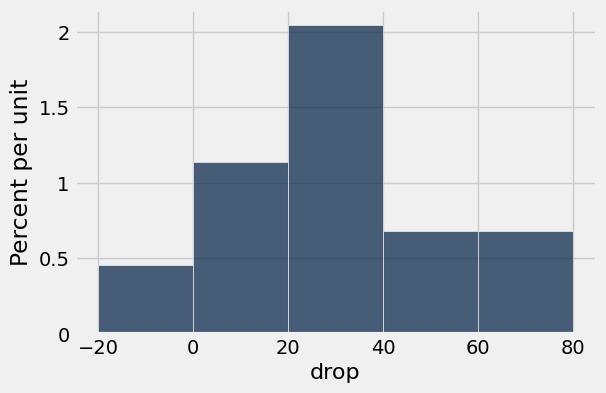

In [ ]:
hodgkins.select('drop').hist(bins=np.arange(-20, 81, 20))

In [ ]:
np.average(hodgkins.column('drop'))

28.615909090909096

표본에서 평균 감소는 약 28.6입니다. 하지만 이것이 우연한 변동의 결과일 수 있을까요? 데이터는 무작위 표본에서 나온 것입니다. 전체 환자 모집단에서 평균 감소가 단지 0일 수 있을까요?

이에 답하기 위해 두 가지 가설을 설정할 수 있습니다:

**귀무가설:** 모집단에서 평균 감소는 0입니다.

**대립가설:** 모집단에서 평균 감소는 0이 아닙니다.

p-값에 대해 1% 기준점으로 이 가설을 검정하기 위해, 모집단의 평균 감소에 대한 근사 99% 신뢰구간을 구성해봅시다.

In [ ]:
def one_bootstrap_mean():
    resample = hodgkins.sample()
    return np.average(resample.column('drop'))

In [ ]:
# 10,000개의 부트스트랩 평균 생성
num_repetitions = 10000
bstrap_means = make_array()
for i in np.arange(num_repetitions):
    bstrap_means = np.append(bstrap_means, one_bootstrap_mean())

In [ ]:
# 99% 신뢰구간의 끝점 가져오기
left = percentile(0.5, bstrap_means)
right = percentile(99.5, bstrap_means)

make_array(left, right)

array([ 17.43909091,  40.41363636])

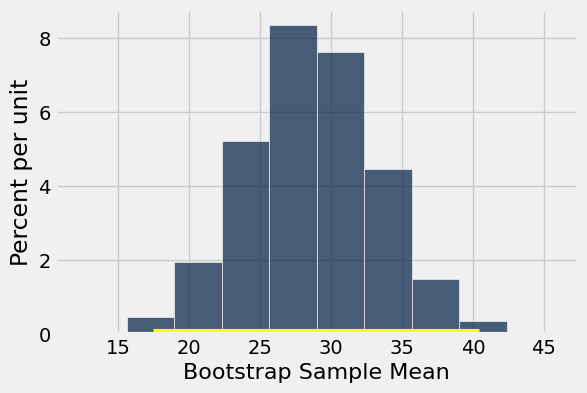

In [ ]:
resampled_means = Table().with_columns(
    'Bootstrap Sample Mean', bstrap_means
)
resampled_means.hist()
plots.plot([left, right], [0, 0], color='yellow', lw=8);

모집단의 평균 감소에 대한 99% 신뢰구간은 약 17에서 약 40까지입니다. 구간은 0을 포함하지 않습니다. 따라서 우리는 귀무가설을 기각합니다.

하지만 우리가 모집단의 평균 감소가 0이 아니라고 단순히 결론 내리는 것보다 더 나은 일을 했다는 것을 주목하세요. 우리는 평균 감소가 얼마나 큰지 추정했습니다. 그것이 단순히 "0이 아니다"라고 말하는 것보다 더 유용한 결과입니다.

**정확도에 대한 참고사항:** 우리의 신뢰구간은 두 가지 주요 이유로 상당히 넓습니다:
- 신뢰수준이 높습니다(99%).
- 표본 크기가 이전 예제에 비해 상대적으로 작습니다.

다음 장에서 표본 크기가 정확도에 어떻게 영향을 미치는지 조사할 것입니다. 또한 기본 데이터의 분포가 전혀 종 모양이 아님에도 불구하고 표본 평균의 경험적 분포가 어떻게 그렇게 자주 종 모양으로 나오는지 조사할 것입니다.

## 맺음말
한 분야의 용어는 보통 그 분야의 주요 연구자들로부터 나옵니다. 부트스트랩 기법을 처음 제안한 [Brad Efron](https://en.wikipedia.org/wiki/Bradley_Efron)은 [미국에서 유래한](https://en.wikipedia.org/wiki/Bootstrapping) 용어를 사용했습니다. 뒤처지지 않기 위해 중국 통계학자들은 [자신들의 방법을 제안했습니다](http://econpapers.repec.org/article/eeestapro/v_3a37_3ay_3a1998_3ai_3a4_3ap_3a321-329.htm).